## **Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2025-10-27 14:46:59.864807: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 14:46:59.886102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761551219.909357 1222239 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761551219.916569 1222239 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-27 14:46:59.941419: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## **Load Dataset dan Data Preparation**

In [3]:
train_path = '../dataset/train'
valid_path = '../dataset/validation'
test_path = '../dataset/test'

In [4]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=40,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,   
    fill_mode='nearest'
).flow_from_directory(
    directory = train_path, target_size = (150,150), batch_size = 4)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = valid_path, target_size = (150,150), batch_size = 4)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory = test_path, target_size = (150,150), batch_size = 4)

visual_batches = test_batches

Found 240 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [5]:
assert train_batches.n == 240
assert valid_batches.n == 32
assert test_batches.n == 28
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 4

## **Visualisasi Data**

Found 240 images belonging to 4 classes.
Contoh Gambar dari Training Set:


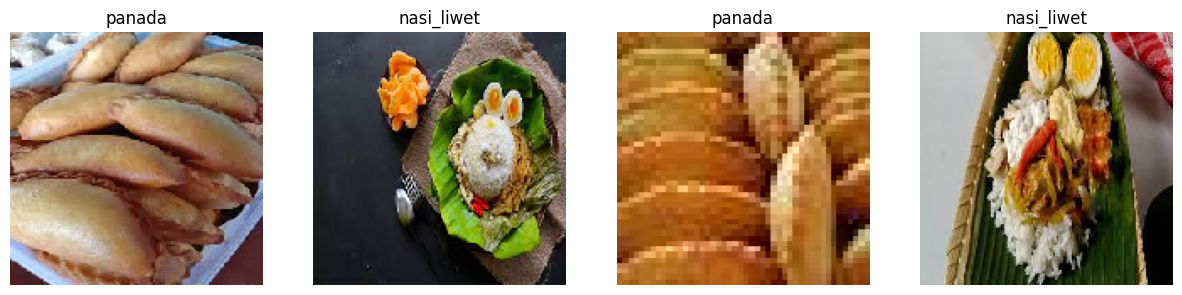

In [6]:
display_datagen = ImageDataGenerator()

display_batches = display_datagen.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    batch_size=4,  
    class_mode='categorical',
    shuffle=True
)

def tampilkan_sampel_gambar(generator, jumlah=4):
    gambar, label = next(generator)

    plt.figure(figsize=(15, 5))
    for i in range(jumlah):
        plt.subplot(1, jumlah, i + 1)
        plt.imshow(gambar[i].astype('uint8'))

        nama_kelas = list(generator.class_indices.keys())[np.argmax(label[i])]
        plt.title(nama_kelas)
        plt.axis('off')
    plt.show()

print("Contoh Gambar dari Training Set:")
tampilkan_sampel_gambar(display_batches, 4)

## **Arsitektur Model**

In [7]:
base_model = MobileNet(
    weights=None,               
    include_top=False,          
    input_shape=(150, 150, 3)   
)

I0000 00:00:1761551224.352915 1222239 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 753 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:16:00.0, compute capability: 8.9
I0000 00:00:1761551224.355084 1222239 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 2531 MB memory:  -> device: 1, name: NVIDIA L40S, pci bus id: 0000:be:00.0, compute capability: 8.9


In [8]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3), 
    Dense(4, activation='softmax') 
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_150 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## **Model Training**

In [ ]:
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=120,
)

Epoch 1/120


/opt/tljh/user/envs/dltf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1761551233.623621 1222738 service.cc:148] XLA service 0x7fe1d4015dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761551233.623684 1222738 service.cc:156]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
I0000 00:00:1761551233.623691 1222738 service.cc:156]   StreamExecutor device (1): NVIDIA L40S, Compute Capability 8.9
2025-10-27 14:47:13.965531: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1761551235

60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.3201 - loss: 1.6069 - val_accuracy: 0.2500 - val_loss: 1.5191
Epoch 2/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4259 - loss: 1.5394 - val_accuracy: 0.2500 - val_loss: 1.6875
Epoch 3/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.3765 - loss: 1.4528 - val_accuracy: 0.2500 - val_loss: 2.1053
Epoch 4/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4269 - loss: 1.4673 - val_accuracy: 0.2500 - val_loss: 2.2679
Epoch 5/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5024 - loss: 1.2299 - val_accuracy: 0.2500 - val_loss: 2.6496
Epoch 6/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4434 - loss: 1.2868 - val_accuracy: 0.2500 - val_loss: 2.3974
Epoch 7/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4722 - loss: 1.1398 - val_accuracy: 0.2500 - val_loss: 2.8126
Epoch 8/120
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5002 - loss: 1.1332 - val_accuracy: 0.2500 - val_

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_batches)

print(f"Loss pada data tes: {loss}")
print(f"Akurasi pada data tes: {accuracy * 100:.2f}%")

## **Evaluasi Model**

In [ ]:
predictions = model.predict(test_batches)
y_pred = np.argmax(predictions, axis=1)
y_true = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save(" BestModel_MobileNet_GWS DL.h5")

print("Model telah berhasil disimpan!")